In [ ]:
# Importmos los paquetes que vamos a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_cafe = pd.read_csv('merged_data_cleaned.csv')
df_cafe
# Contamos con un df de 1339 filas × 44 columnas

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


In [ ]:
df_cafe.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [ ]:
# Tomares algunas columnas para nuestro analisis
df = df_cafe[['Owner', 'Species', 'Country.of.Origin', 'Region','Number.of.Bags', 'Bag.Weight', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']]
df.shape

(1339, 28)

In [ ]:
df.head(5)

,Owner,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,Variety,Processing.Method,Aroma,Flavor,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,metad plc,Arabica,Ethiopia,guji-hambela,300,60 kg,NaN,Washed / Wet,8.67,8.83,...,90.58,0.12,0,0.0,Green,0,m,1950.0,2200.0,2075.0
1,metad plc,Arabica,Ethiopia,guji-hambela,300,60 kg,Other,Washed / Wet,8.75,8.67,...,89.92,0.12,0,0.0,Green,1,m,1950.0,2200.0,2075.0
2,grounds for health admin,Arabica,Guatemala,NaN,5,1,Bourbon,NaN,8.42,8.50,...,89.75,0.00,0,0.0,NaN,0,m,1600.0,1800.0,1700.0
3,yidnekachew dabessa,Arabica,Ethiopia,oromia,320,60 kg,NaN,Natural / Dry,8.17,8.58,...,89.00,0.11,0,0.0,Green,2,m,1800.0,2200.0,2000.0
4,metad plc,Arabica,Ethiopia,guji-hambela,300,60 kg,Other,Washed / Wet,8.25,8.50,...,88.83,0.12,0,0.0,Green,2,m,1950.0,2200.0,2075.0


In [ ]:
df.describe(include='all')
# Vemos que es el que mas frecuencia se encuentra en nuestro dataframe

,Owner,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,Variety,Processing.Method,Aroma,Flavor,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1332,1339,1338,1280,1339.000000,1339,1113,1169,1339.000000,1339.000000,...,1339.000000,1339.000000,1339.000000,1338.000000,1121,1339.000000,1339,1109.000000,1109.000000,1109.000000
unique,315,2,36,356,NaN,56,29,5,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,2,NaN,NaN,NaN
top,juan luis alvarado romero,Arabica,Mexico,huila,NaN,1 kg,Caturra,Washed / Wet,NaN,NaN,...,NaN,NaN,NaN,NaN,Green,NaN,m,NaN,NaN,NaN
freq,155,1311,236,112,NaN,331,256,815,NaN,NaN,...,NaN,NaN,NaN,NaN,870,NaN,1157,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,154.182972,NaN,NaN,NaN,7.566706,7.520426,...,82.089851,0.088379,0.479462,0.173393,NaN,3.556385,NaN,1750.713315,1799.347775,1775.030545
std,NaN,NaN,NaN,NaN,129.987162,NaN,NaN,NaN,0.377560,0.398442,...,3.500575,0.048287,2.549683,0.832121,NaN,5.312541,NaN,8669.440545,8668.805771,8668.626080
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,7.420000,7.330000,...,81.080000,0.090000,0.000000,0.000000,NaN,0.000000,NaN,1100.000000,1100.000000,1100.000000
50%,NaN,NaN,NaN,NaN,175.000000,NaN,NaN,NaN,7.580000,7.580000,...,82.500000,0.110000,0.000000,0.000000,NaN,2.000000,NaN,1310.640000,1350.000000,1310.640000
75%,NaN,NaN,NaN,NaN,275.000000,NaN,NaN,NaN,7.750000,7.750000,...,83.670000,0.120000,0.000000,0.000000,NaN,4.000000,NaN,1600.000000,1650.000000,1600.000000


In [ ]:
# Vamos a ver la cantidad de datos faltantes
print(df.isna().sum().sort_values(ascending = False))
print('La cantidad de datos faltantes es: ',sum(df.isna().sum()) )

altitude_mean_meters    230
altitude_high_meters    230
altitude_low_meters     230
Variety                 226
Color                   218
Processing.Method       170
Region                   59
Owner                     7
Country.of.Origin         1
Quakers                   1
Aroma                     0
Flavor                    0
Number.of.Bags            0
unit_of_measurement       0
Category.Two.Defects      0
Bag.Weight                0
Category.One.Defects      0
Moisture                  0
Total.Cup.Points          0
Cupper.Points             0
Sweetness                 0
Clean.Cup                 0
Species                   0
Balance                   0
Body                      0
Acidity                   0
Aftertaste                0
Uniformity                0
dtype: int64
La cantidad de datos faltantes es:  1372


# Data Cleaning

Analisemos algunas varibales con los faltantes

In [ ]:
# Iniciamos haciendo una copia de nuestro df original
df_to_clean = df.copy(deep= True)

In [ ]:
# Vamos a ver los datos null de la altura si estos tienen que ver con los faltantes de las demas 
# variables 
df[df['altitude_mean_meters'].isna()].describe(include = 'all')

,Owner,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,Variety,Processing.Method,Aroma,Flavor,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,230,230,229,175,230.000000,230,116,156,230.000000,230.000000,...,230.000000,230.000000,230.000000,230.000000,153,230.000000,230,0.0,0.0,0.0
unique,52,2,20,51,NaN,27,14,5,NaN,NaN,...,NaN,NaN,NaN,NaN,4,NaN,2,NaN,NaN,NaN
top,kona pacific farmers cooperative,Arabica,United States (Hawaii),kona,NaN,100 lbs,Hawaiian Kona,Natural / Dry,NaN,NaN,...,NaN,NaN,NaN,NaN,Green,NaN,m,NaN,NaN,NaN
freq,52,227,71,64,NaN,59,44,74,NaN,NaN,...,NaN,NaN,NaN,NaN,100,NaN,159,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,131.517391,NaN,NaN,NaN,7.548043,7.519130,...,81.994652,0.070696,1.021739,0.339130,NaN,3.656522,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,133.121762,NaN,NaN,NaN,0.346802,0.389549,...,2.965827,0.056849,4.592994,1.214087,NaN,5.521639,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,6.170000,6.080000,...,70.670000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,7.330000,7.330000,...,80.670000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,NaN,7.580000,7.580000,...,82.580000,0.100000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,275.000000,NaN,NaN,NaN,7.810000,7.750000,...,83.830000,0.110000,1.000000,0.000000,NaN,5.000000,NaN,NaN,NaN,NaN


In [ ]:
# Procedemos a la limpieza de las variables realcionadas con la altura
idx = df_to_clean['altitude_mean_meters'].dropna().index
df_to_clean = df[df.index.isin(idx)]

In [ ]:
# Vamos a ver la variable color que tiene mas null, vamos a verlos mas de cerca a ver que encontramos
idx_color = df_to_clean['Color'].dropna().index
df_to_clean = df_to_clean[df_to_clean.index.isin(idx_color)]

df_to_clean

,Owner,Species,Country.of.Origin,Region,Number.of.Bags,Bag.Weight,Variety,Processing.Method,Aroma,Flavor,...,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,metad plc,Arabica,Ethiopia,guji-hambela,300,60 kg,NaN,Washed / Wet,8.67,8.83,...,90.58,0.12,0,0.0,Green,0,m,1950.0,2200.0,2075.0
1,metad plc,Arabica,Ethiopia,guji-hambela,300,60 kg,Other,Washed / Wet,8.75,8.67,...,89.92,0.12,0,0.0,Green,1,m,1950.0,2200.0,2075.0
3,yidnekachew dabessa,Arabica,Ethiopia,oromia,320,60 kg,NaN,Natural / Dry,8.17,8.58,...,89.00,0.11,0,0.0,Green,2,m,1800.0,2200.0,2000.0
4,metad plc,Arabica,Ethiopia,guji-hambela,300,60 kg,Other,Washed / Wet,8.25,8.50,...,88.83,0.12,0,0.0,Green,2,m,1950.0,2200.0,2075.0
9,diamond enterprise plc,Arabica,Ethiopia,"snnp/kaffa zone,gimbowereda",50,60 kg,Other,Natural / Dry,8.08,8.58,...,88.25,0.10,0,0.0,Green,4,m,1795.0,1850.0,1822.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,mannya coffee project,Robusta,Uganda,southern,6,60 kg,NaN,NaN,7.75,7.42,...,80.50,0.12,0,0.0,Green,1,m,1200.0,1200.0,1200.0
1331,andrew hetzel,Robusta,India,chikmagalur,100,2 kg,NaN,NaN,7.67,7.67,...,80.17,0.00,0,0.0,Bluish-Green,1,m,750.0,750.0,750.0
1332,andrew hetzel,Robusta,India,chikmagalur,250,2 kg,NaN,Natural / Dry,7.58,7.42,...,80.17,0.00,0,0.0,Green,0,m,750.0,750.0,750.0
1333,andrew hetzel,Robusta,United States,chikmagalur,100,1 kg,Arusha,Natural / Dry,7.92,7.50,...,79.33,0.00,0,0.0,Green,0,m,3000.0,3000.0,3000.0


In [ ]:
# Terminamos de limpiar los datos
df = df_to_clean[df_to_clean.index.isin(df_to_clean['Variety'].dropna().index)]
df.shape


(911, 28)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<AxesSubplot:xlabel='altitude_mean_meters'>

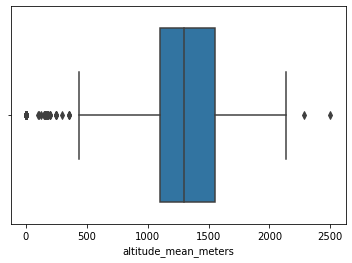

In [ ]:
# Vamos a seguir limpiando el dataset, y vemos que la columna df['altitude_mean_meters'], tiene valores en 
# pies y en metros asi que vamos a unificarla y dejar
for i in range(len(df['altitude_mean_meters'])):
    if df['altitude_mean_meters'].iloc[i] > 2500 or df['altitude_mean_meters'].iloc[i] < 100:
        df['altitude_mean_meters'].iloc[i] = 0
        

sns.boxplot(data = df, x = 'altitude_mean_meters')
# Arreglmos la altura sobre el nivel del mar que son datos erronios, pero los otrso datos 
# como sabor aroma si nos interesa un poco


## Data Exploration

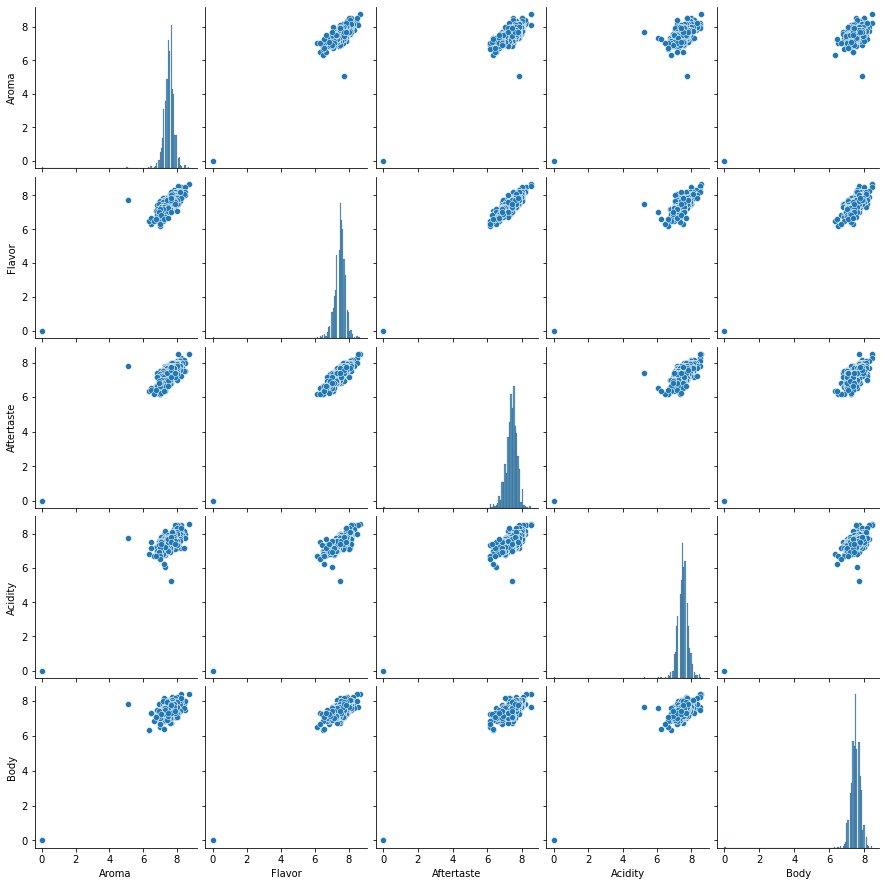

In [ ]:
sns.pairplot(df, vars = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body'])

In [ ]:
 calidades = ['Cafe Corriente', 'Cafe Especialidad', 'Ejemplar Regional plus','Cafe Ejemplar', 'Cafe Unico']
 df['cat_calidad'] = pd.cut(df['Total.Cup.Points'], bins=[70, 80, 83, 89, 95, 100], labels= calidades)




/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, '% de cantidad')

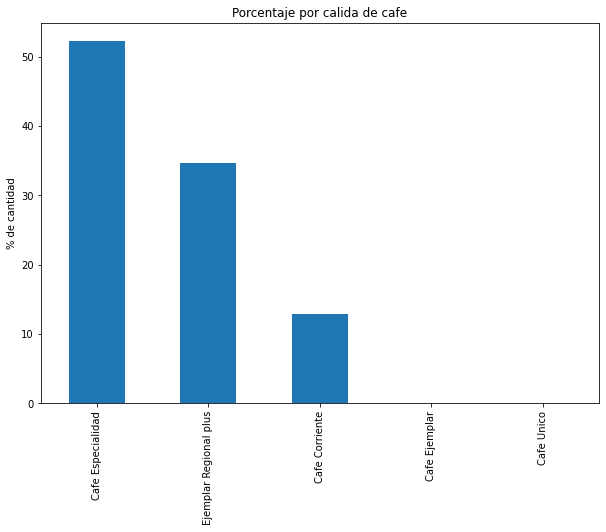

In [ ]:
# Veamos como estan distribuidos las calidades en el dataset 
cal = df['cat_calidad'].value_counts(normalize=True)*100
cal.plot(kind ='bar', figsize = (10,7))
plt.title('Porcentaje por calida de cafe')
plt.ylabel('% de cantidad')

In [ ]:
# Vamos a hacer un dataframe con uno al azar de cada categoria, para hacer la comparasion 
# de cada categoria a ver que caracteristicas unicas tiene
c_ejemplar = df[df['cat_calidad'] == 'Cafe Ejemplar'].sample().to_numpy().tolist()
c_especialidad = df[df['cat_calidad'] == 'Cafe Especialidad'].sample().to_numpy().tolist()
c_corriente = df[df['cat_calidad'] == 'Cafe Corriente'].sample().to_numpy().tolist()
c_plus = df[df['cat_calidad'] == 'Ejemplar Regional plus'].sample().to_numpy().tolist()
c_ejemplar

[['metad plc',
  'Arabica',
  'Ethiopia',
  'guji-hambela',
  300,
  '60 kg',
  'Other',
  'Washed / Wet',
  8.75,
  8.67,
  8.5,
  8.58,
  8.42,
  8.42,
  10.0,
  10.0,
  10.0,
  8.58,
  89.92,
  0.12,
  0,
  0.0,
  'Green',
  1,
  'm',
  1950.0,
  2200.0,
  2075.0,
  'Cafe Ejemplar']]

In [ ]:
# Vamos a hacer el grafico spyder
from math import pi
columnas = ['Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup',
       'Sweetness', 'Cupper.Points','Categoria' ]
df_calidad = pd.DataFrame(columns=columnas)
df_calidad.iloc[0] = [c_ejemplar[0][8:18], c_ejemplar[28:] ]
df_calidad



IndexError: iloc cannot enlarge its target object

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1bbe7208-05f4-4bda-a05e-48e97ac1db26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>